In [56]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from functools import reduce

plt.style.use('ggplot')

In [280]:
results = pd.read_csv("/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/gwgm-ca-run-results-Oct1.csv")

In [281]:
results[results.queryName.str.contains("TRACKS-USA-GRID")]["clusterId"].unique()
# results[results.clusterId == "j-11AWG13F4DOTP"]["system"].unique()

array(['j-1ARM8G9DJ87OB', 'j-3QM7K0X5LADHA', 'j-3PVS64AS1BSOS',
       'j-13GQ1ODP8Q22E', 'j-RL3D8OZQ9QZN', 'j-11AWG13F4DOTP',
       'j-3AZ89QEUDJV2Y', 'j-T2ABC3RWVDJN'], dtype=object)

In [282]:
def get_cluster_results(clusterId):
    return results[results.clusterId == clusterId]

def remove_outiers(df):
    Q1 = df['duration'].quantile(0.25)
    Q3 = df['duration'].quantile(0.75)
    IQR = Q3 - Q1

    #Values between Q1-1.5IQR and Q3+1.5IQR
    return df.query('(@Q1 - 1.5 * @IQR) <= duration <= (@Q3 + 1.5 * @IQR)')

def get_qn(qn, df, r=True):
    q = df[df.queryName.str.contains(qn)]
    if r:
        return remove_outiers(q)
    else:
        return q

In [287]:
gw_default = get_cluster_results("j-1ARM8G9DJ87OB")
gm_default = get_cluster_results("j-3QM7K0X5LADHA")
# gw_match = get_cluster_results("j-3PVS64AS1BSOS")
# gm_match = get_cluster_results("j-13GQ1ODP8Q22E")

# # Old nathan
# gm_default = get_cluster_results("j-11AWG13F4DOTP")
# gw_default = get_cluster_results("j-T2ABC3RWVDJN")

# Young Eugene
# gm_default = get_cluster_results("j-3QM7K0X5LADHA")
# gw_default = get_cluster_results("j-1ARM8G9DJ87OB")

# gm_match = get_cluster_results("j-3E3KPNGKVFRTK")
# gw_match = get_cluster_results("j-HK05V75VYI20")

# # Fake matching index results until we get results
# gm_match = get_cluster_results("j-11AWG13F4DOTP")
# gw_match = get_cluster_results("j-T2ABC3RWVDJN")

gm_default = gm_default[gm_default.queryName.str.contains("USA-GRID")].copy()
gw_default = gw_default[gw_default.queryName.str.contains("USA-GRID")].copy()

# gm_match = gm_match[gm_match.queryName.str.contains("USA-GRID")].copy()
# gw_match = gw_match[gw_match.queryName.str.contains("USA-GRID")].copy()

gm_default.count()

uuid                 33651
duration             33651
system               33651
timeAtFirstResult    33651
clusterId            33651
startTime            33651
endTime              33651
result               33651
queryName            33651
dtype: int64

In [288]:
def label_time(row):
    qn = row['queryName'].upper()
    if "5DAY" in qn:
        return 5
    if "1WEEK" in qn:
        return 7
    if "9DAY" in qn:
        return 9
    if "18DAY" in qn:
        return 18
    if "27DAY" in qn:
        return 27
    if "1MONTH" in qn:
        return 30

gm_default['time'] = gm_default.apply(label_time, axis=1)
gw_default['time'] = gw_default.apply(label_time, axis=1)

# gm_match['time'] = gm_match.apply(label_time, axis=1)
# gm_match['time'] = gm_match.apply(label_time, axis=1)

gm_default.time.unique()

array([30,  7, 18, 27])

In [289]:
def label_zoom(row):
    try:
        return int(row['queryName'].split('-')[-3])
    except:
        print(row['queryName'])
        raise

gm_default['zoom'] = gm_default.apply(label_zoom, axis=1)
gw_default['zoom'] = gw_default.apply(label_zoom, axis=1)

# gm_match['zoom'] = gm_match.apply(label_zoom, axis=1)
# gw_match['zoom'] = gw_match.apply(label_zoom, axis=1)

gm_default.zoom.unique()

array([7, 6, 4, 5])

In [290]:
gm = gm_default
gw = gw_default

gm4 = gm[gm.zoom == 4]
gw4 = gw[gw.zoom == 4]
gm5 = gm[gm.zoom == 5]
gw5 = gw[gw.zoom == 5]
gm6 = gm[gm.zoom == 6]
gw6 = gw[gw.zoom == 6]
gm7 = gm[gm.zoom == 7]
gw7 = gw[gw.zoom == 7]

gmt5 = gm[gm.time == 5]
gwt5 = gw[gw.time == 5]
gmt7 = gm[gm.time == 7]
gwt7 = gw[gw.time == 7]
gmt9 = gm[gm.time == 9]
gwt9 = gw[gw.time == 9]
gmt18 = gm[gm.time == 18]
gwt18 = gw[gw.time == 18]
gmt27 = gm[gm.time == 27]
gwt27 = gw[gw.time == 27]
gmt30 = gm[gm.time == 30]
gwt30 = gw[gw.time == 30]

gmt18.count()


uuid                 4000
duration             4000
system               4000
timeAtFirstResult    4000
clusterId            4000
startTime            4000
endTime              4000
result               4000
queryName            4000
time                 4000
zoom                 4000
dtype: int64

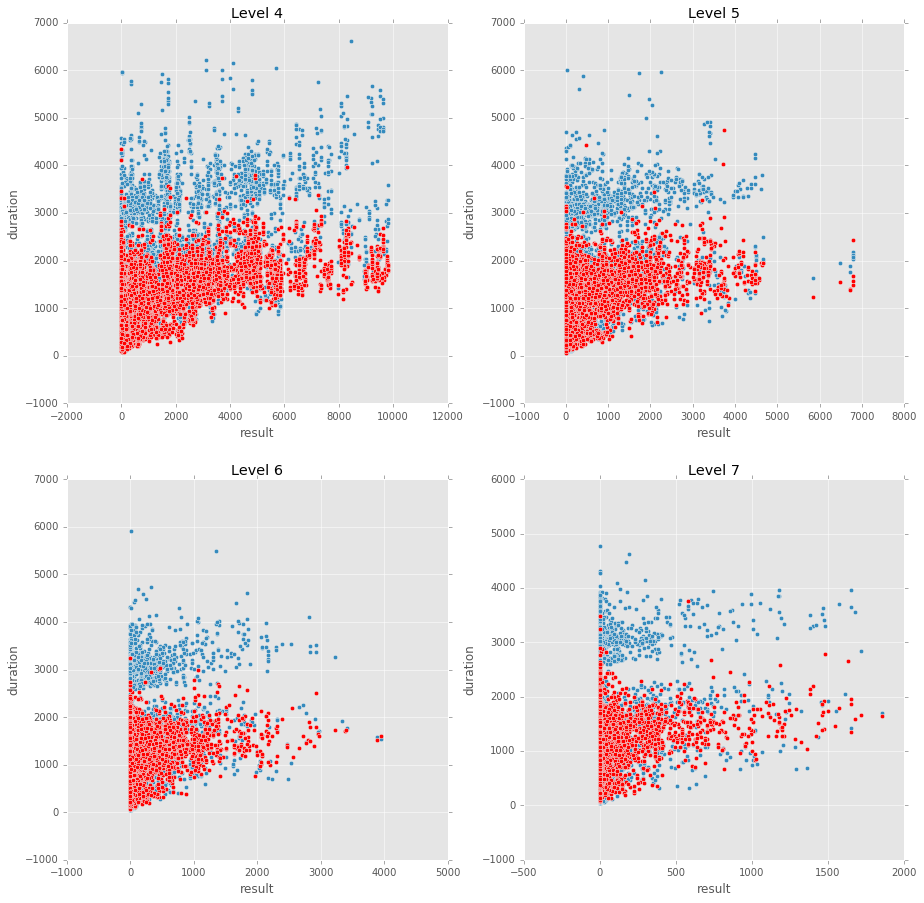

In [295]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

# fig = plt.figure()
# ax = fig.add_subplot(111)
# ax.set_xlabel('result')
# ax.set_ylabel('duration (ms)')

mm = gm[gm.result < 10000]
wm = gw[gw.result < 10000]

sm = gm[gm.zoom == 7]
sw = gw[gw.zoom == 7]

def do_scatter(df1, df2, ax):
    df2.plot.scatter(x="result", y="duration", ax=ax)
    df1.plot.scatter(x="result", y="duration", ax=ax, color="red")
   

# mm[mm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2, color="red")
# wm[wm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2)

def do_regression(df1, df2):
    mx = df1.result.values.reshape(-1,1)
    my = df1.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(mx, my)

    plt.plot(mx, regr.predict(mx), color='orangered', linewidth=1)

    wx = df2.result.values.reshape(-1,1)
    wy = df2.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(wx, wy)

    plt.plot(wx, regr.predict(wx), color='lightskyblue', linewidth=1)

ax1.set_title("Level 4")
do_scatter(gm4, gw4, ax1)
ax2.set_title("Level 5")
do_scatter(gm5, gw5, ax2)
ax3.set_title("Level 6")
do_scatter(gm6, gw6, ax3)
ax4.set_title("Level 7")
do_scatter(gm7, gw7, ax4)
# do_regression()
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

save = True
fname = "tracks-scatter-by-level"
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
    fig.savefig(path, dpi=300, bbox_inches='tight')  


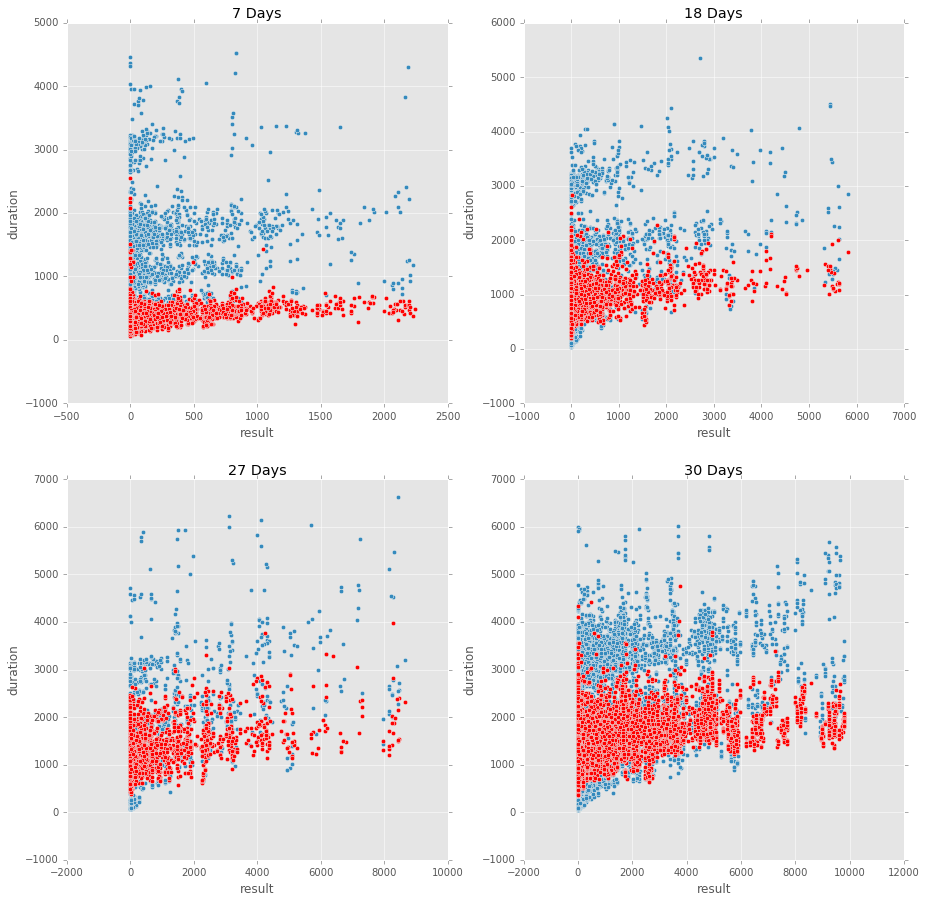

In [298]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

def do_scatter(df1, df2, ax):
    df2.plot.scatter(x="result", y="duration", ax=ax)
    df1.plot.scatter(x="result", y="duration", ax=ax, color="red")
    

# mm[mm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2, color="red")
# wm[wm.result < 50000].plot.scatter(x="result", y="duration", ax=ax2)

def do_regression(df1, df2):
    mx = df1.result.values.reshape(-1,1)
    my = df1.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(mx, my)

    plt.plot(mx, regr.predict(mx), color='orangered', linewidth=1)

    wx = df2.result.values.reshape(-1,1)
    wy = df2.duration.values.reshape(-1,1)

    regr = linear_model.LinearRegression()
    regr.fit(wx, wy)

    plt.plot(wx, regr.predict(wx), color='lightskyblue', linewidth=1)

def scatter_older():
    ax1.set_title("5 Days")
    do_scatter(gmt5, gwt5, ax1)
    ax2.set_title("7 Days")
    do_scatter(gmt7, gwt7, ax2)
    ax3.set_title("18 Days")
    do_scatter(gmt18, gwt18, ax3)
    ax4.set_title("27 Days")
    do_scatter(gmt27, gwt27, ax4)
    # ax6.set_title("30 Days")
    # do_scatter(gmt30, gwt30, ax4)

def scatter_newer():
    ax1.set_title("7 Days")
    do_scatter(gmt7, gwt7, ax1)
    ax2.set_title("18 Days")
    do_scatter(gmt18, gwt18, ax2)
    ax3.set_title("27 Days")
    do_scatter(gmt27, gwt27, ax3)
    ax4.set_title("30 Days")
    do_scatter(gmt30, gwt30, ax4)
    # ax6.set_title("30 Days")
    # do_scatter(gmt30, gwt30, ax4)
    
scatter_newer()

#do_regression()
fig.set_figwidth(15)
fig.set_figheight(15)
plt.show()

save = True
fname = "tracks-scatter-by-days"
if save:
    path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
    fig.savefig(path, dpi=300, bbox_inches='tight')  


In [277]:
gw_default_durations = gw_default[['queryName', "duration", "result", "time", "zoom"]].rename(columns = { "duration": "gw_default_duration"})
gw_default_durations["gw_default_ttfr"] = gw_default['timeAtFirstResult'] - gw_default['startTime']

gm_default_durations = gm_default[['queryName', "duration"]].rename(columns = { "duration": "gm_default_duration"})
gm_default_durations["gm_default_ttfr"] = gm_default['timeAtFirstResult'] - gm_default['startTime']

gw_match_durations = gw_match[['queryName', "duration"]].rename(columns = { "duration": "gw_match_duration"})
gw_match_durations["gw_match_ttfr"] = gw_match['timeAtFirstResult'] - gw_match['startTime']

gm_match_durations = gm_match[['queryName', "duration"]].rename(columns = { "duration": "gm_match_duration"})
gm_match_durations["gm_match_ttfr"] = gm_match['timeAtFirstResult'] - gm_match['startTime']

df_slices = [gw_default_durations.groupby("queryName").aggregate(np.mean).reset_index(),
             gm_default_durations.groupby("queryName").aggregate(np.mean).reset_index()]

df_slices = [gw_default_durations.groupby("queryName").aggregate(np.mean).reset_index(),
             gm_default_durations.groupby("queryName").aggregate(np.mean).reset_index(),
             gw_match_durations.groupby("queryName").aggregate(np.mean).reset_index(),
             gm_match_durations.groupby("queryName").aggregate(np.mean).reset_index()]

combined = reduce(lambda x, y: pd.merge(x, y, on="queryName"), df_slices)

combined = combined[["queryName", "result", "time", "zoom",
                     "gm_default_duration", "gw_default_duration",
                     "gm_match_duration", "gw_match_duration",
                     "gm_default_ttfr", "gw_default_ttfr",
                     "gm_match_ttfr", "gw_match_ttfr"]]

#Filter 0's
#combined = combined[combined.result != 0]

#combined.result.hist()
gw_match_durations.groupby("queryName").aggregate(np.mean).reset_index().queryName.unique()



array(['TRACKS-USA-GRID--MATCHED_TRACKS-1WEEK-0-4-0-7',
       'TRACKS-USA-GRID--MATCHED_TRACKS-1WEEK-0-4-14-0',
       'TRACKS-USA-GRID--MATCHED_TRACKS-1WEEK-0-4-14-3', ...,
       'TRACKS-USA-GRID-MATCHED_TRACKS-27DAY-5-4-0-6',
       'TRACKS-USA-GRID-MATCHED_TRACKS-27DAY-5-4-3-2',
       'TRACKS-USA-GRID-MATCHED_TRACKS-27DAY-8-4-2-1'], dtype=object)

In [263]:
bins = 10
total_ranges = pd.qcut(combined.result, bins, retbins=True)[1]
print(total_ranges)
print(combined.dtypes)
#total_ranges = ranges.unique()
grouped_by_result_quantiles = combined.copy()
grouped_by_result_quantiles['range_group'] = pd.qcut(combined.result, bins, labels=False)


ValueError: Bin edges must be unique: array([ nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  nan])

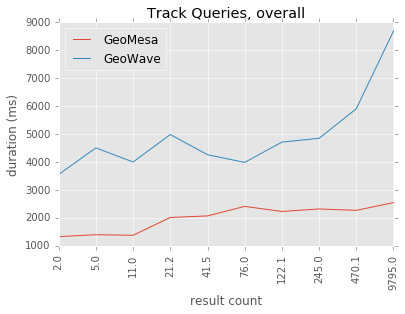

In [313]:
def plot_agg(grouped_agg,
             title,
             fname,
             include_default=True,
             include_match=True,
             range_cap=None,
             save=True):
    ranges = total_ranges
    xticks = list(map(str, list(ranges[1:])))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('result count')
    ax.set_ylabel('duration (ms)')
    plot_columns = { }
    if include_default and include_match:
        plot_columns["gw_default_duration"] = "GeoWave - default index configuration"
        plot_columns["gm_default_duration"] = "GeoMesa - default index configuration"
        plot_columns["gw_match_duration"] = "GeoWave - matched index configuration"
        plot_columns["gm_match_duration"] = "GeoMesa - matched index configuration"
    elif include_match:
        plot_columns["gw_match_duration"] = "GeoWave"
        plot_columns["gm_match_duration"] = "GeoMesa"
    else:
        plot_columns["gw_default_duration"] = "GeoWave"
        plot_columns["gm_default_duration"] = "GeoMesa"

    df = grouped_agg[list(sorted(plot_columns.keys()))].rename(columns = plot_columns)
    df.plot.line(ax = ax, title=title)

    if not range_cap:
        range_cap = bins
    plt.xticks(range(0, range_cap), xticks, rotation='vertical')
    plt.xlabel("result count")
#     leg = ax.legend(loc='center left', bbox_to_anchor=(2, 0.5))
    # set the linewidth of each legend object
#     for legobj in leg.legendHandles:
#         legobj.set_linewidth(5.0)
    plt.show()
    
    fname = "duration-by-result-count"
    if save:
        path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
        fig.savefig(path, dpi=300, bbox_inches='tight')  
        
def agg_for_time(days, range_cap = None):
    df = grouped_by_result_quantiles[grouped_by_result_quantiles.days == days]
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean)

def agg_for_x(expr, range_cap = None):
    df = grouped_by_result_quantiles[expr]
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean)

def agg_for_time_less(days, range_cap = None):
    return agg_for_x(grouped_by_result_quantiles.days < days, range_cap)

def agg_for_time_greater(days, range_cap = None):
    return agg_for_x(grouped_by_result_quantiles.days > days, range_cap)

def agg_for_all(range_cap = None):
    df = grouped_by_result_quantiles
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean)

def plot_for_all(range_cap = 20):
    overall_agg = agg_for_all(range_cap = range_cap)
    plot_agg(overall_agg, 
             "Track Queries, overall",
             "legend",#overall-duration-vs-result-both-cap-20",
             include_default = True,
             include_match = False,
             range_cap = range_cap,
             save = True)
    
def plot_for_days_less(range_cap = 20):
    overall_agg = agg_for_time_less(days = 30, range_cap = range_cap)
    plot_agg(overall_agg, 
             "City Buffer Queries, times less than 30 days",
             "lt-30days-duration-vs-result-both-cap-20",
             include_default = True,
             include_match = True,
             range_cap = range_cap,
             save = False)
    
def plot_for_days_greater(range_cap = 20):
    overall_agg = agg_for_time_greater(days = 30, range_cap = range_cap)
    plot_agg(overall_agg, 
             "City Buffer Queries, times greater than 30 days",
             "gt-30days-duration-vs-result-both",
             include_default = True,
             include_match = True,
             range_cap = range_cap,
             save = False)
    
range_cap = None
plot_for_all(range_cap)
# plot_for_days_less(range_cap)
# plot_for_days_greater(range_cap)


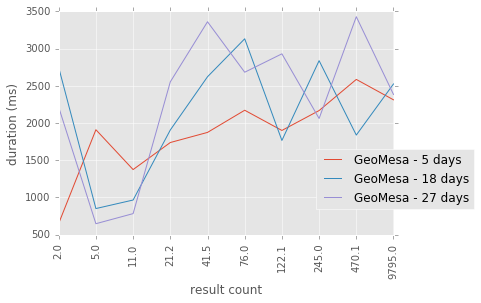

In [327]:
def plot_agg_times(times,
             title,
             fname,
             include_geomesa=True,
             include_geowave=True,
             range_cap=None,
             save=True):
    ranges = total_ranges
    xticks = list(map(str, list(ranges[1:])))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('result count')
    ax.set_ylabel('duration (ms)')
    plot_columns = { }
    if include_geomesa:
        plot_columns["gm_default_duration"] = "GeoMesa"
    if include_geowave:
        plot_columns["gw_default_duration"] = "GeoWave"

    # print(grouped_agg.time.unique())
    for time in times:
        pc = dict(map(lambda x: (x[0], x[1] + ' - %d days' % time), plot_columns.copy().items()))
        grouped_agg = agg_for_time(time, range_cap)
        grouped_agg[list(sorted(pc.keys()))].rename(columns = pc).plot.line(ax = ax, title=title)

    if not range_cap:
        range_cap = bins
    plt.xticks(range(0, range_cap), xticks, rotation='vertical')
    plt.xlabel("result count")
    ax.legend(loc='center left', bbox_to_anchor=(0.75, 0.25))
    plt.show()
    
    fname = "geomesa-duration-by-result-count-and-days"
    if save:
        path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
        fig.savefig(path, dpi=300, bbox_inches='tight')  
        

def agg_for_time(time, range_cap = None):
    df = grouped_by_result_quantiles[grouped_by_result_quantiles.time == time]
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean).reset_index()

times = [5, 18, 27]
def plot_for_all(range_cap = 20):
    overall_agg = agg_for_all(range_cap = range_cap)
    plot_agg_times( times,
             "",
             "overall-duration-vs-result-both-cap-20",
             include_geomesa = True,
             include_geowave = False,
             range_cap = range_cap,
             save = True)
    
    
range_cap = None
plot_for_all(range_cap)
# plot_for_days_less(range_cap)
# plot_for_days_greater(range_cap)


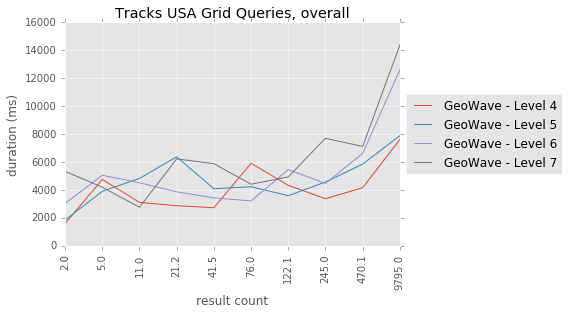

In [303]:
def plot_agg_zooms(zooms,
             title,
             fname,
             include_geomesa=True,
             include_geowave=True,
             range_cap=None,
             save=True):
    ranges = total_ranges
    xticks = list(map(str, list(ranges[1:])))
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.set_xlabel('result count')
    ax.set_ylabel('duration (ms)')
    plot_columns = { }
    if include_geomesa:
        plot_columns["gm_default_duration"] = "GeoMesa"
    if include_geowave:
        plot_columns["gw_default_duration"] = "GeoWave"

    # print(grouped_agg.time.unique())
    for zoom in zooms:
        pc = dict(map(lambda x: (x[0], x[1] + ' - Level %d' % zoom), plot_columns.copy().items()))
        grouped_agg = agg_for_zoom(zoom, range_cap)
        grouped_agg[list(sorted(pc.keys()))].rename(columns = pc).plot.line(ax = ax, title=title)

    if not range_cap:
        range_cap = bins
    plt.xticks(range(0, range_cap), xticks, rotation='vertical')
    plt.xlabel("result count")
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()
    if save:
        path = "/Users/rob/proj/lt/gwgm/geowave-geomesa-comparative-analysis/analyze/pngset/%s.png" % fname
        fig.savefig(path, dpi=300, bbox_inches='tight')  
        

def agg_for_zoom(zoom, range_cap = None):
    df = grouped_by_result_quantiles[grouped_by_result_quantiles.zoom == zoom]
    if range_cap:
        df = df[df.range_group < range_cap]
    grouped_for_plot = df.groupby(["range_group"])
    
    return grouped_for_plot.aggregate(np.mean).reset_index()
    
def plot_for_all(range_cap = 20):
    overall_agg = agg_for_all(range_cap = range_cap)
    plot_agg_zooms( [4, 5, 6, 7],
             "Tracks USA Grid Queries, overall",
             "overall-duration-vs-result-both-cap-20",
             include_geomesa = False,
             include_geowave = True,
             range_cap = range_cap,
             save = False)
    
range_cap = None
plot_for_all(range_cap)
# plot_for_days_less(range_cap)
# plot_for_days_greater(range_cap)
